In [1]:
%load_ext krokimagic

# Configuration

In [2]:
%%kroki?

Docstring:
::

  %kroki [--url URL] [--ssl | --no-ssl] [--expand_vars | --no-expand_vars]
             type

positional arguments:
  type                  required kroki diagram type, one of ['actdiag',
                        'blockdiag', 'bpmn', 'bytefield', 'c4plantuml', 'd2',
                        'dbml', 'diagramsnet', 'ditaa', 'dot', 'erd',
                        'excalidraw', 'graphviz', 'kroki', 'mermaid',
                        'nomnoml', 'nwdiag', 'packetdiag', 'pikchr',
                        'plantuml', 'rackdiag', 'seqdiag', 'structurizr',
                        'svgbob', 'umlet', 'vega', 'vegalite', 'wavedrom']

options:
  --url URL, -u URL     URL of kroki server to be used, defaults to
                        os.env['KROKI_ENDPOINT'] and if not set to
                        https://kroki.io]
  --ssl, --no-ssl       verify ssl chain (default: True)
  --expand_vars, --no-expand_vars
                        replace/expand variables from user namespace within
       

## URL

URL is read from `-u | --url` argument, if ommitted it falls back to operation system environment var `KROKI_ENDPOINT`, if that one is **not** set it uses `https://kroki.io`

In [3]:
import os
original_endpoint=os.environ.get('KROKI_ENDPOINT')
os.environ['KROKI_ENDPOINT']='https://kroki.io'
os.environ.get('KROKI_ENDPOINT')

'https://kroki.io'

with above settings, `%%kroki svgbob ... ` and `%%kroki -u https://kroki.io svgbob ...` reach out to same server

/Users/grundp/.asdf/installs/python/3/lib/python3.10/site-packages/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'sfs.prod.aws.orange.bisnode.net'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


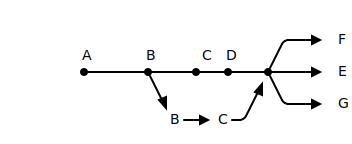

In [4]:
%%kroki svgbob
  

                                   .--->  F
          A       B      C  D     /
          *-------*-----*---*----*----->  E
                   \            ^ \
                    v          /   '--->  G
                     B --> C -'

In [5]:
os.environ['KROKI_ENDPOINT']=original_endpoint

## SSL
if you use a self-hosted kroki server, chances are you're using some self-signed certificate as well ...
To come around this, we introduced `--no-ssl` flag. It advices `requests`to not check ssl chain and hides its warnings.

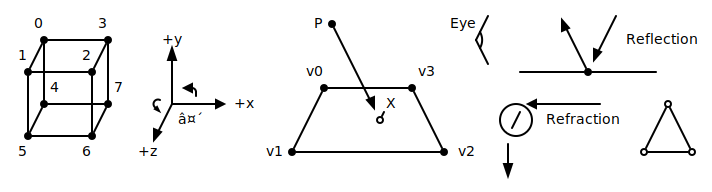

In [6]:
%%kroki --no-ssl svgbob
  
    0       3                          P *              Eye /         ^     /
     *-------*      +y                    \                +)          \   /  Reflection
  1 /|    2 /|       ^                     \                \           \ v
   *-+-----* |       |                v0    \       v3           --------*--------
   | |4    | |7      | ◄╮               *----\-----*
   | *-----|-*     ⤹ +-----> +x        /      v X   \          ,-.<--------        o
   |/      |/       / ⤴               /        o     \        ( / ) Refraction    / \
   *-------*       v                 /                \        `-'               /   \
  5       6      +z              v1 *------------------* v2    |                o-----o
                                                               v


## variable expansion

In order to expand (read replace) variables in the cell content, before sending to kroki server, enable `--expand-vars` flag.

In [7]:
person=['Alice','Bob']

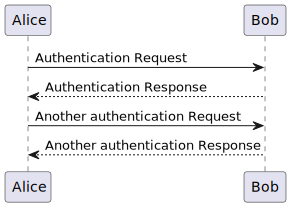

In [8]:
%%kroki --expand_vars plantuml
@startuml
{person[0]} -> {person[1]}: Authentication Request
{person[1]} --> {person[0]}: Authentication Response

{person[0]} -> {person[1]}: Another authentication Request
{person[0]} <-- {person[1]}: Another authentication Response
@enduml

# Diagrams

## UML

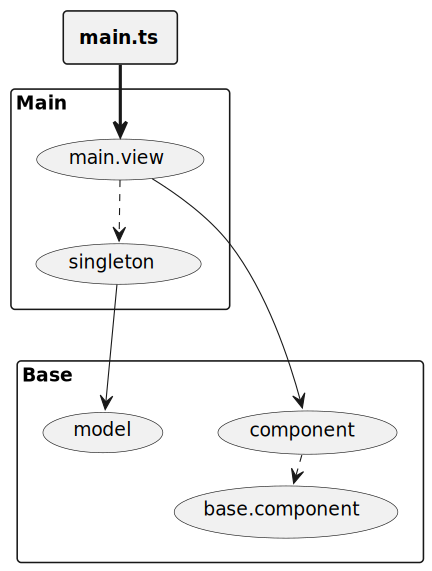

In [9]:
%%kroki --no-ssl plantuml

skinparam monochrome true
skinparam ranksep 20
skinparam dpi 150
skinparam arrowThickness 0.7
skinparam packageTitleAlignment left
skinparam usecaseBorderThickness 0.4
skinparam defaultFontSize 12
skinparam rectangleBorderThickness 1

rectangle "Main" {
  (main.view)
  (singleton)
}
rectangle "Base" {
  (base.component)
  (component)
  (model)
}
rectangle "<b>main.ts</b>" as main_ts

(component) ..> (base.component)
main_ts ==> (main.view)
(main.view) --> (component)
(main.view) ...> (singleton)
(singleton) ---> (model)

## Block Diagram

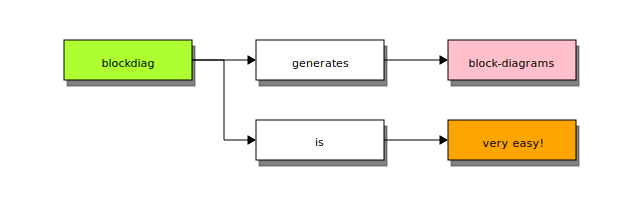

In [10]:
%%kroki -u https://kroki.io blockdiag

blockdiag {
  blockdiag -> generates -> "block-diagrams";
  blockdiag -> is -> "very easy!";

  blockdiag [color = "greenyellow"];
  "block-diagrams" [color = "pink"];
  "very easy!" [color = "orange"];
}

## Sequence Diagram

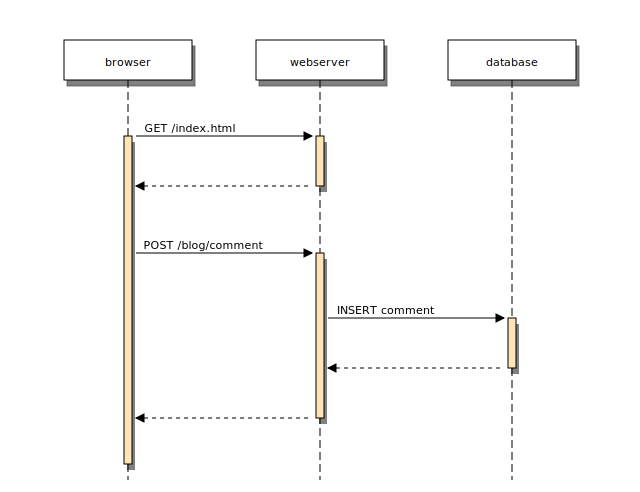

In [11]:
%%kroki -u https://kroki.io seqdiag

seqdiag {
  browser  -> webserver [label = "GET /index.html"];
  browser <-- webserver;
  browser  -> webserver [label = "POST /blog/comment"];
  webserver  -> database [label = "INSERT comment"];
  webserver <-- database;
  browser <-- webserver;
}

## Activity Diagram

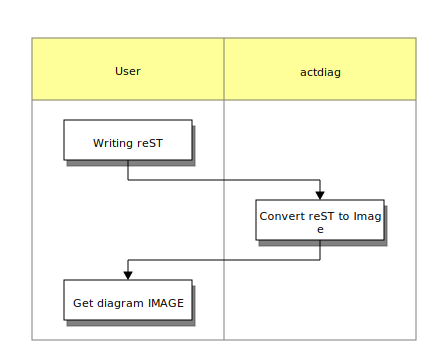

In [12]:
%%kroki -u https://kroki.io actdiag

actdiag {
  write -> convert -> image

  lane user {
    label = "User"
    write [label = "Writing reST"];
    image [label = "Get diagram IMAGE"];
  }
  lane actdiag {
    convert [label = "Convert reST to Image"];
  }
}

## ERD

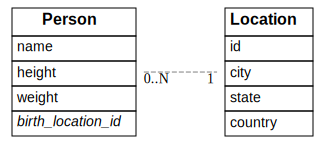

In [13]:
%%kroki erd

[Person]
*name
height
weight
+birth_location_id

[Location]
*id
city
state
country

Person *--1 Location

## Gantt

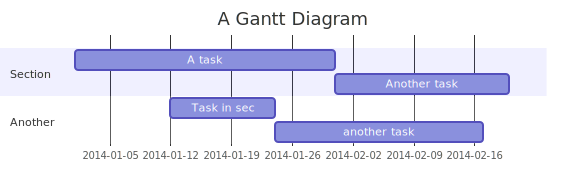

In [14]:
%%kroki -u https://kroki.io mermaid

gantt
    title A Gantt Diagram
    dateFormat  YYYY-MM-DD
    section Section
    A task           :a1, 2014-01-01, 30d
    Another task     :after a1, 20d
    section Another
    Task in sec      :2014-01-12, 12d
    another task     :24d

## MindMap

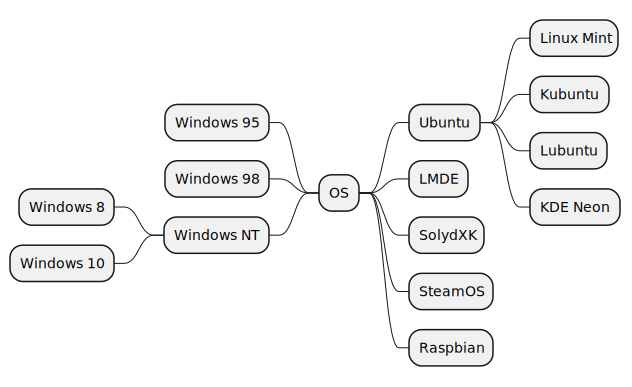

In [15]:
%%kroki plantuml

@startmindmap
skinparam monochrome true
+ OS
++ Ubuntu
+++ Linux Mint
+++ Kubuntu
+++ Lubuntu
+++ KDE Neon
++ LMDE
++ SolydXK
++ SteamOS
++ Raspbian
-- Windows 95
-- Windows 98
-- Windows NT
--- Windows 8
--- Windows 10
@endmindmap

## SvgBob

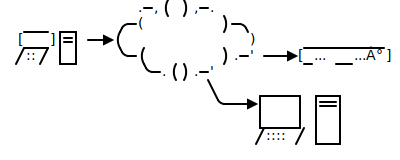

In [16]:
%%kroki svgbob
                 .-,(  ),-.
   ___  _      .-(          )-.
  [___]|=| -->(                )      __________
  /::/ |_|     '-(          ).-' --->[_...__...°]
                  '-.( ).-'
                          \      ____   __
                           '--->|    | |==|
                                |____| |  |
                                /::::/ |__|